In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [201]:
testSites = pd.read_csv('./data_sets/NC_testSites.csv')
byRace = pd.read_csv('./data_sets/NC_counties_byRace.csv')
byHisp = pd.read_csv('./data_sets/NC_counties_byHisp.csv')
testSites.columns

/Users/jincho/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'fulladdr', 'municipality',
       'agency', 'agencytype', 'phone', 'agencyurl', 'operhours',
       'Instructions', 'status', 'drive_through', 'appt_only',
       'referral_required', 'services_offered_onsite', 'call_first',
       'virtual_screening', 'health_dept_url', 'State', 'county',
       'type_of_test', 'facility_type'],
      dtype='object')

In [202]:
testSites_cond = testSites.drop(columns=['municipality','Unnamed: 0', 'name', 'agency', 'phone', 'agencyurl', 'Instructions', 'drive_through', 'appt_only', 'call_first', 'health_dept_url', 'State'])

In [16]:
testSites_cond.head()

,fulladdr,agencytype,operhours,status,referral_required,services_offered_onsite,virtual_screening,county,type_of_test,facility_type
0,"111 Gateway Center Drive, Kernersville, NC 27284",Non Profit,8am - 5pm M-F,Open,Yes,screening and testing,Available,Forsyth,molecular,Clinic
1,"600 Highland Oaks Drive, Winston-Salem, NC 27103",Non Profit,8am - 5pm M-F,Open,Yes,screening and testing,NaN,Forsyth,molecular,Clinic
2,"1814 Westchester Dr., Suite 202, High Point",Non Profit,"8am - 5pm M-F by appointment only, 1pm - 5pm S...",Open,Yes,NaN,NaN,Guilford,molecular,Clinic
3,"1713 South Church Street, Burlington, NC 27215",Private,Monday: 8:00AM - 8:00PM Tuesday: 8:00AM - ...,Open,No,screening and testing,Available,Alamance,molecular and antibody,Urgent Care
4,"903 Randolph St, Thomasville, NC 27360",Regional,"Monday to Friday, 8 a.m. to 5 p.m",Open,Yes,screening and testing,Available,Davidson,molecular,Non-medical Facility


In [203]:
testSites_cond = testSites_cond[(testSites_cond.status!='Closed') & (testSites_cond.status!='Temporarily Closed')]

In [78]:
print(byHisp[byHisp['CTYNAME']=='Forsyth'].TOT_POP.iloc[0])

354524


In [41]:
byHisp.head()

,Unnamed: 0,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,...,TOT_NHIA,TOT_NHAA,TOT_NHNA,TOT_NHTOM,TOT_HWA,TOT_HBA,TOT_HIA,TOT_HAA,TOT_HNA,TOT_HTOM
0,57,North Carolina,Alamance,152692,72642,80050,48605,53836,13041,15351,...,564,1931,60,2203,13995,855,1547,82,41,581
1,285,North Carolina,Alexander,37026,18827,18199,16296,16243,1208,751,...,91,359,13,428,1486,57,60,4,1,29
2,513,North Carolina,Allegha,11016,5449,5567,4681,5048,66,69,...,18,55,3,86,889,30,34,10,1,26
3,741,North Carolina,Ans,26512,13829,12683,6173,5889,6713,6194,...,154,290,4,284,632,61,50,14,12,42
4,969,North Carolina,Ashe,26986,13303,13683,12191,12972,81,74,...,50,113,5,230,1162,47,22,2,7,30


In [204]:
comb_test_hisp = pd.DataFrame(columns = ['county', 'testSites', 'totPop', \
                                         'totNHWA', 'totNHBA', 'totNHIA', 'totNHAA', 'totNHNA', 'totNHTOM',\
                                         'totHWA', 'totHBA', 'totHIA', 'totHAA', 'totHNA', 'totHTOM'])
comb_test_hisp.head()

,county,testSites,totPop,totNHWA,totNHBA,totNHIA,totNHAA,totNHNA,totNHTOM,totHWA,totHBA,totHIA,totHAA,totHNA,totHTOM


In [205]:
for county in testSites_cond.county.unique():
    if(county in byHisp.CTYNAME.unique()):
        num_testSites = len(testSites_cond[testSites_cond.county==county])
        totPop = byHisp[byHisp['CTYNAME']==county].TOT_POP.iloc[0]
        totNHWA = byHisp[byHisp['CTYNAME']==county].TOT_NHWA.iloc[0]
        totNHBA = byHisp[byHisp['CTYNAME']==county].TOT_NHBA.iloc[0]
        totNHIA = byHisp[byHisp['CTYNAME']==county].TOT_NHIA.iloc[0]
        totNHAA = byHisp[byHisp['CTYNAME']==county].TOT_NHAA.iloc[0]
        totNHNA = byHisp[byHisp['CTYNAME']==county].TOT_NHNA.iloc[0]
        totNHTOM = byHisp[byHisp['CTYNAME']==county].TOT_NHTOM.iloc[0]
        totHWA = byHisp[byHisp['CTYNAME']==county].TOT_HWA.iloc[0]
        totHBA = byHisp[byHisp['CTYNAME']==county].TOT_HBA.iloc[0]
        totHIA = byHisp[byHisp['CTYNAME']==county].TOT_HIA.iloc[0]
        totHAA = byHisp[byHisp['CTYNAME']==county].TOT_HAA.iloc[0]
        totHNA = byHisp[byHisp['CTYNAME']==county].TOT_HNA.iloc[0]
        totHTOM = byHisp[byHisp['CTYNAME']==county].TOT_HTOM.iloc[0]
        comb_test_hisp = comb_test_hisp.append({'county':county, 'testSites':num_testSites, 'totPop':totPop, 'totNHWA':totNHWA, \
                           'totNHBA':totNHBA, 'totNHIA':totNHIA, 'totNHAA':totNHAA, 'totNHNA':totNHNA, \
                           'totNHTOM':totNHTOM, 'totHWA':totHWA, 'totHBA':totHWA, 'totHIA':totHIA,\
                           'totHAA':totHAA, 'totHNA':totHNA, 'totHTOM':totHTOM}, ignore_index=True)
    
    
    

In [107]:
comb_test_hisp.head()

,county,testSites,totPop,totNHWA,totNHBA,totNHIA,totNHAA,totNHNA,totNHTOM,totHWA,totHBA,totHIA,totHAA,totHNA,totHTOM
0,Forsyth,20,354524,207890,90814,937,6934,186,5271,33070,33070,1962,275,200,1533
1,Guilford,22,494953,266735,161153,2122,20330,229,8757,28598,28598,1393,352,137,1319
2,Alamance,5,152692,102441,28392,564,1931,60,2203,13995,13995,1547,82,41,581
3,Wake,48,928787,576108,189845,2642,52166,319,16969,73297,73297,5070,707,279,3487
4,Moore,5,89262,69328,11775,690,821,28,1265,4700,4700,115,45,115,172


In [206]:
comb_test_hisp = comb_test_hisp.set_index('county')

In [207]:
comb_test_hisp['totNH'] = comb_test_hisp['totNHWA']+comb_test_hisp['totNHBA']+comb_test_hisp['totNHIA']+comb_test_hisp['totNHAA']+\
                        comb_test_hisp['totNHNA']+comb_test_hisp['totNHTOM']


In [208]:
comb_test_hisp['totH'] = comb_test_hisp['totHWA']+comb_test_hisp['totHBA']+comb_test_hisp['totHIA']+comb_test_hisp['totHAA']+\
                        comb_test_hisp['totHNA']+comb_test_hisp['totHTOM']


In [209]:
comb_test_hisp['H_perc'] = comb_test_hisp['totH'] / comb_test_hisp['totPop']
comb_test_hisp['NH_perc'] = comb_test_hisp['totNH'] / comb_test_hisp['totPop']

In [217]:
comb_test_hisp['site_perc'] = comb_test_hisp['testSites'] / sum(comb_test_hisp['testSites'])

In [218]:
comb_test_hisp['totPop_class'] = np.round(np.array(comb_test_hisp['totPop']).astype(np.double),-3)

In [219]:
comb_test_hisp['totPop_class'].sort_values().unique()

array([  4000.,   6000.,   9000.,  10000.,  12000.,  13000.,  15000.,
        20000.,  21000.,  22000.,  23000.,  24000.,  27000.,  33000.,
        34000.,  37000.,  40000.,  41000.,  45000.,  47000.,  49000.,
        52000.,  53000.,  54000.,  56000.,  58000.,  59000.,  64000.,
        69000.,  82000.,  89000.,  91000.,  93000.,  96000.,  97000.,
       110000., 124000., 135000., 142000., 153000., 154000., 161000.,
       181000., 185000., 206000., 241000., 277000., 331000., 355000.,
       495000., 929000., 944000.])

In [222]:
bins = [0, 15000, 30000, 45000, 60000, 100000, 200000, np.inf]
labels = ['<15000', '15000-30000', '30000-45000', '45000-60000', '60000-100000', '100000-200000', '200000+']

comb_test_hisp['totPop_class'] = pd.cut(comb_test_hisp['totPop'], bins, labels=labels)

comb_test_hisp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Forsyth to Tyrrell
Data columns (total 20 columns):
testSites       55 non-null object
totPop          55 non-null object
totNHWA         55 non-null object
totNHBA         55 non-null object
totNHIA         55 non-null object
totNHAA         55 non-null object
totNHNA         55 non-null object
totNHTOM        55 non-null object
totHWA          55 non-null object
totHBA          55 non-null object
totHIA          55 non-null object
totHAA          55 non-null object
totHNA          55 non-null object
totHTOM         55 non-null object
totNH           55 non-null object
totH            55 non-null object
H_perc          55 non-null object
NH_perc         55 non-null object
totPop_class    55 non-null category
site_perc       55 non-null object
dtypes: category(1), object(19)
memory usage: 9.0+ KB


Text(0.5,0,'Counties in Descending Population Size')

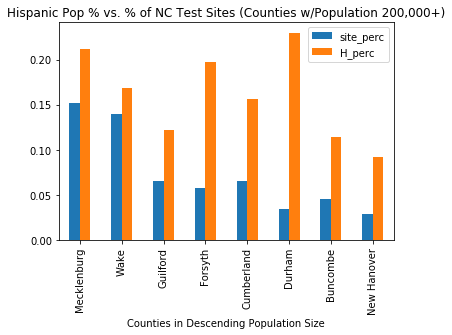

In [262]:
ax = comb_test_hisp[comb_test_hisp.totPop_class=='200000+']\
.sort_values(by='totPop', ascending=False)[['site_perc', 'H_perc']].plot.bar()
ax.set_title('Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 200,000+)')
ax.set_xlabel('Counties in Descending Population Size')

Text(0.5,0,'Counties in Descending Population Size')

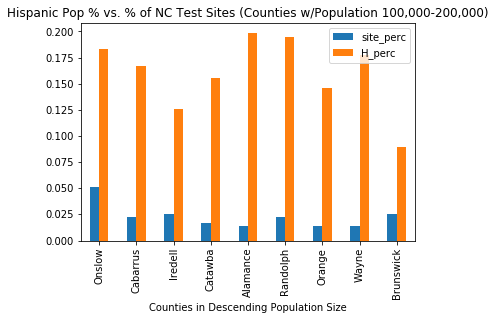

In [263]:
ax1 = comb_test_hisp[comb_test_hisp.totPop_class=='100000-200000']\
.sort_values(by='totPop', ascending=False)[['site_perc', 'H_perc']].plot.bar()
ax1.set_title('Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 100,000-200,000)')
ax1.set_xlabel('Counties in Descending Population Size')

Text(0.5,0,'Counties in Descending Population Size')

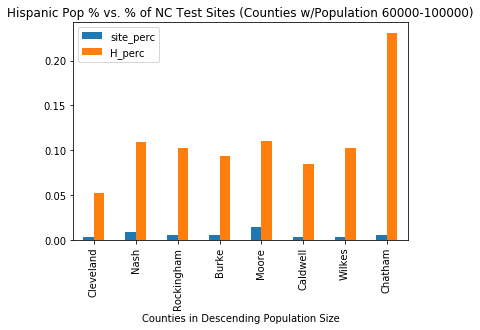

In [264]:
ax2 = comb_test_hisp[comb_test_hisp.totPop_class=='60000-100000']\
.sort_values(by='totPop', ascending=False)[['site_perc', 'H_perc']].plot.bar()
ax2.set_title('Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 60000-100000)')
ax2.set_xlabel('Counties in Descending Population Size')

Text(0.5,0,'Counties in Descending Population Size')

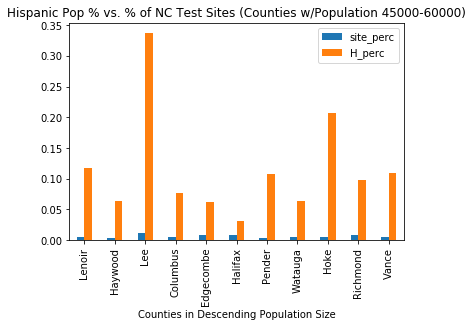

In [265]:
ax3 = comb_test_hisp[comb_test_hisp.totPop_class=='45000-60000']\
.sort_values(by='totPop', ascending=False)[['site_perc', 'H_perc']].plot.bar()
ax3.set_title('Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 45000-60000)')
ax3.set_xlabel('Counties in Descending Population Size')

In [266]:
comb_test_hisp['corr_testSites'] = comb_test_hisp['testSites']/10


Text(0.5,0,'Counties in Descending Population Size')

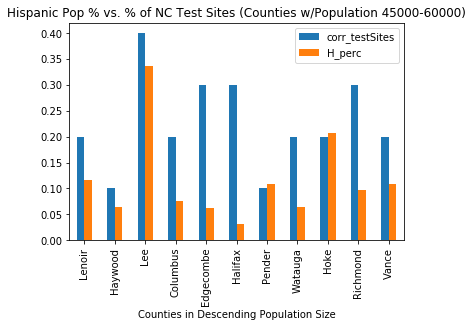

In [267]:
ax3 = comb_test_hisp[comb_test_hisp.totPop_class=='45000-60000']\
.sort_values(by='totPop', ascending=False)[['corr_testSites', 'H_perc']].plot.bar()
ax3.set_title('Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 45000-60000)')
ax3.set_xlabel('Counties in Descending Population Size')

Text(0.5,0,'Counties in Descending Population Size')

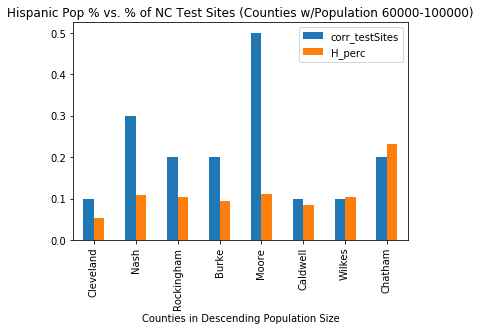

In [268]:
ax2 = comb_test_hisp[comb_test_hisp.totPop_class=='60000-100000']\
.sort_values(by='totPop', ascending=False)[['corr_testSites', 'H_perc']].plot.bar()
ax2.set_title('Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 60000-100000)')
ax2.set_xlabel('Counties in Descending Population Size')

In [269]:
import plotly.express as px

In [273]:
comb_test_hisp["H_perc"] = comb_test_hisp["H_perc"].astype(float)
fig = px.bar(comb_test_hisp[comb_test_hisp.totPop_class=='200000+'], \
             x=comb_test_hisp[comb_test_hisp.totPop_class=='200000+'].index, \
             y='testSites',\
             hover_data=['H_perc', 'testSites'],
            color='H_perc',
            title='Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 200,000+)')
fig.show()

In [253]:
comb_test_hisp["H_perc"] = comb_test_hisp["H_perc"].astype(float)
fig = px.bar(comb_test_hisp[comb_test_hisp.totPop_class=='100000-200000'], \
             x=comb_test_hisp[comb_test_hisp.totPop_class=='100000-200000'].index, \
             y='testSites',\
             hover_data=['H_perc', 'testSites'],
            color='H_perc',
            title='Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 100000-200000)')
fig.show()

In [256]:
comb_test_hisp["H_perc"] = comb_test_hisp["H_perc"].astype(float)
fig = px.bar(comb_test_hisp[comb_test_hisp.totPop_class=='60000-100000'], \
             x=comb_test_hisp[comb_test_hisp.totPop_class=='60000-100000'].index, \
             y='testSites',\
             hover_data=['H_perc', 'testSites'],
            color='H_perc',
            title='Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 60000-100000)')
fig.show()

In [259]:
comb_test_hisp["H_perc"] = comb_test_hisp["H_perc"].astype(float)
fig = px.bar(comb_test_hisp[comb_test_hisp.totPop_class=='45000-60000'], \
             x=comb_test_hisp[comb_test_hisp.totPop_class=='45000-60000'].index, \
             y='testSites',\
             hover_data=['H_perc', 'testSites'],
            color='H_perc',
            title='Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 45000-60000)')
fig.show()

In [271]:
comb_test_hisp["H_to_sites"] = comb_test_hisp['totH'] / comb_test_hisp['testSites']
comb_test_hisp["NH_to_sites"] = comb_test_hisp['totNH'] / comb_test_hisp['testSites']


Text(0.5,0,'Counties in Descending Population Size')

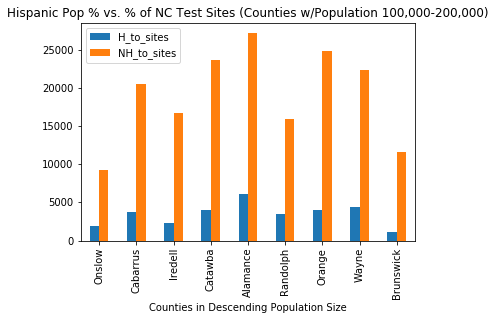

In [272]:
ax1 = comb_test_hisp[comb_test_hisp.totPop_class=='100000-200000']\
.sort_values(by='totPop', ascending=False)[['H_to_sites', 'NH_to_sites']].plot.bar()
ax1.set_title('Hispanic Pop % vs. % of NC Test Sites (Counties w/Population 100,000-200,000)')
ax1.set_xlabel('Counties in Descending Population Size')

In [ ]:
comb_test_hisp.to_csv('./data_sets/NC_combined_testSitesRa')